# 一、简单引入

## 1 简单例子：用k-近邻算法分类一个电影是爱情片还是动作片。

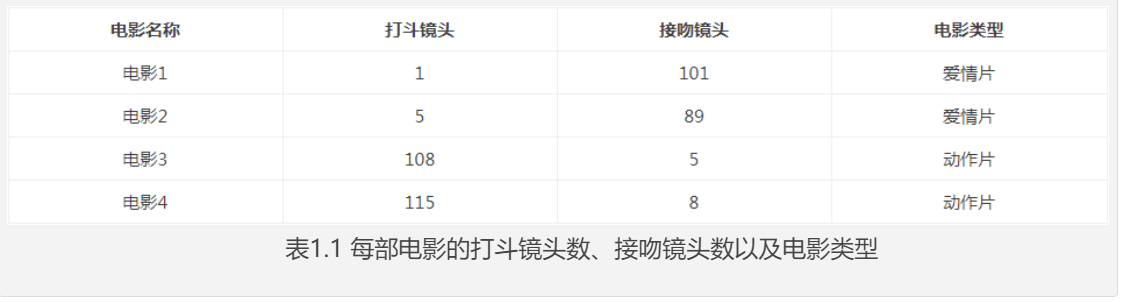

k-近邻算法步骤如下：

    1、计算已知类别数据集中的点与当前点之间的距离；
    2、按照距离递增次序排序；
    3、选取与当前点距离最小的k个点；
    4、确定前k个点所在类别的出现频率；
    5、返回前k个点所出现频率最高的类别作为当前点的预测分类。

### 1.1 准备数据集

In [31]:
import numpy as np
import operator

In [2]:
def createDataset():
    """
    函数说明:创建数据集
    Parameters:
        无
    Returns:
        group - 数据集
        labels - 分类标签
    """
    # 四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    # 四组二维特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels

In [5]:
if __name__ == '__main__':
    # 创建数据集
    group, labels = createDataset()
    # 打印数据集
    print(group)
    print(labels)

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]]
['爱情片', '爱情片', '动作片', '动作片']


### 1.2 k-近邻算法

根据两点距离公式，计算距离，选择距离最小的前k个点，并返回分类结果。

In [49]:
def classify0(inX, dataSet, labels, k):
    # numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    # 为了比较测试点和其他点的距离，将测试点在列方向上展开,和其他点一一对应相减
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 二维特征相减后平方
    sqdiffMat = diffMat ** 2
    # 距离的公式：欧氏距离：[(x1-y1)**2+(x2-y2)**2]**0.5
    sqDistances = sqdiffMat.sum(axis=1)
    distance = sqDistances**0.5
    # 返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distance.argsort()
    # 定一个计算类别次数的字典
    classCount = {}
    for i in range(k):
        # 取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        # dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    # reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=lambda x:x[1],reverse=True)
    return sortedClassCount[0][0]

In [50]:
if __name__ == '__main__':
    # 创建数据集
    group, labels = createDataset()
    # 打印数据集
    print(group)
    print(labels)
    # 测试集
    test = [101,20]
    # kNN分类
    test_class = classify0(test, group, labels, 3)
    print(test_class)

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]]
['爱情片', '爱情片', '动作片', '动作片']
动作片


# 二、k-近邻算法实战之约会网站配对效果判定

k-近邻算法的一般流程：

    1、收集数据：可以使用爬虫进行数据的收集，也可以使用第三方提供的免费或收费的数据。一般来讲，数据放在txt文本文件中，按照一定的格式进行存储，便于解析及处理。
    2、准备数据：使用Python解析、预处理数据。
    3、分析数据：可以使用很多方法对数据进行分析，例如使用Matplotlib将数据可视化。
    4、测试算法：计算错误率。
    5、使用算法：错误率在可接受范围内，就可以运行k-近邻算法进行分类。

## 实战背景

海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：

    不喜欢的人
    魅力一般的人
    极具魅力的人
    
海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。

海伦收集的样本数据主要包含以下3种特征：

    1、每年获得的飞行常客里程数
    2、玩视频游戏所消耗时间百分比
    3、每周消费的冰淇淋公升数

### 2.1 准备数据：数据解析

在将上述特征数据输入到分类器前，必须将待处理的数据的格式改变为分类器可以接收的格式。分类器接收的数据是什么格式的？要将数据分类两部分，即特征矩阵和对应的分类标签向量。

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

In [68]:
def file2matrix(filename):
    """
    函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

    Parameters:
        filename - 文件名
    Returns:
        returnMat - 特征矩阵
        classLabelVector - 分类Label向量
    """
    # 打开文件
    with open(filename, 'rt', encoding='utf-8') as fr:
        # 读取文件所有行
        arrayOLines = fr.readlines()
        # 获取文件行数
        numberOflines = len(arrayOLines)
        # 返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
        returnMat = np.zeros((numberOflines, 3))
        # 返回的分类标签向量
        classLabelVector = []
        # 行的索引值
        index = 0
        for line in arrayOLines:
            # s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
            line = line.strip()
            # 使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
            listFromLine = line.split('\t')
            # 将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
            returnMat[index: ] = listFromLine[0:3]
            # #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
            classTypeDict = {'didntLike':1,'smallDoses':2,'largeDoses':3}
            classKey = list(set(listFromLine[-1:]) & set(classTypeDict.keys()))[0]
            classLabelVector.append(classTypeDict.get(classKey))
            index += 1
        return returnMat, classLabelVector

In [ ]:
if __name__ == '__main__':
    # 打开的文件名
    filename = "./0_file/datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    print(datingDataMat)
    print(datingLabels)

### 2.3 分析数据：数据可视化

In [ ]:
def showdatas(datingDataMat, datingLabels):
    """
    函数说明:可视化数据

    Parameters:
        datingDataMat - 特征矩阵
        datingLabels - 分类Label
    Returns:
        无
    Modify:
        2017-03-24
    """

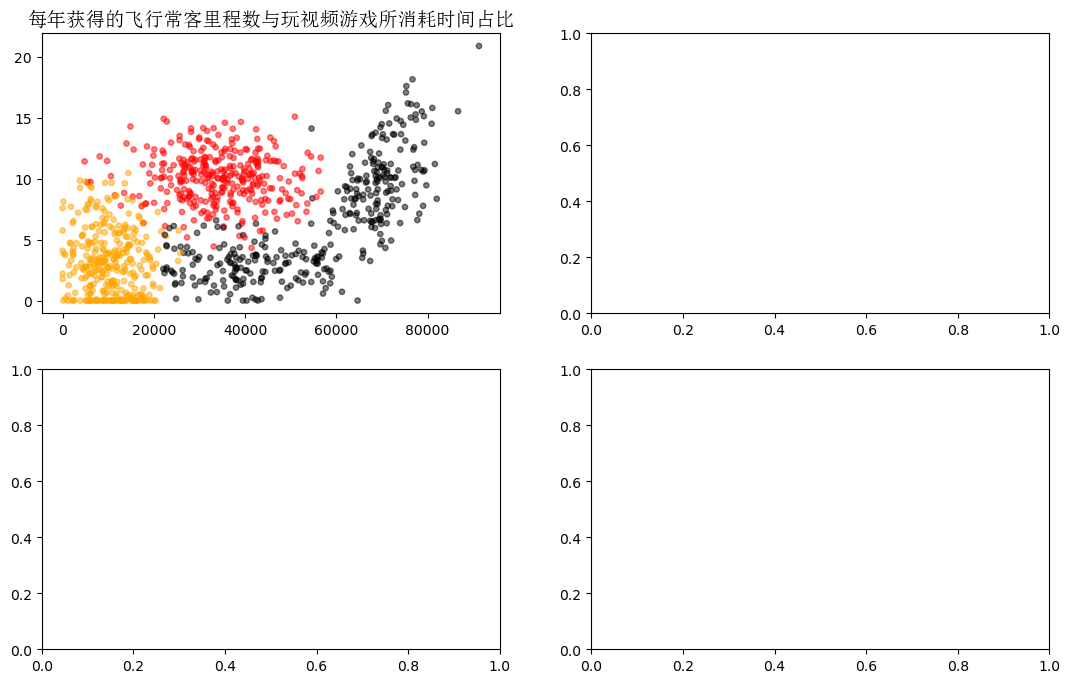

In [97]:
# 设置汉字字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(13,8))
LabelsColors = []
for i in datingLabels:
    if i == 1:
        LabelsColors.append('black')
    if i == 2:
        LabelsColors.append('orange')
    if i == 3:
        LabelsColors.append('red')
# 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors, s=15, alpha=0.5)
# 设置标题,x轴label,y轴label
axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',fontproperties=font)